In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
from nltk.tokenize import word_tokenize # For tokenizing the words
from nltk.corpus import stopwords # To Remove the stop words
from collections import Counter # To build the category

from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from nltk.corpus import stopwords
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize


from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet
import os 
import matplotlib.pyplot as plt 
from nltk.tokenize import RegexpTokenizer

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
from nltk.tokenize import word_tokenize # For tokenizing the words
from nltk.corpus import stopwords # To Remove the stop words
from collections import Counter # To build the category

from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize # To tokenize sentences
ps = PorterStemmer() # To perform stemming

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/real-or-fake-fake-jobposting-prediction/fake_job_postings.csv


**Naive Bayes Approach**

In [2]:
# Converting the json to data frame 
df = pd.read_csv('/kaggle/input/real-or-fake-fake-jobposting-prediction/fake_job_postings.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [3]:
df.head(4)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0


In [4]:
collated_df = pd.DataFrame()
collated_df['text'] = df['title'] + ' ' + df['location'] + ' ' + df['department'] + ' ' + df['company_profile'] + ' ' + df['description'] + ' ' + df['requirements'] + ' ' + df['benefits'] + ' ' + df['employment_type'] + ' ' + df['required_education'] + ' ' + df['industry'] + ' ' + df['function'] 
collated_df['fraudulent'] = df['fraudulent']

In [5]:
# Making a copy of the data frame to work with
base_df = collated_df.copy()
base_df

,text,fraudulent
0,NaN,0
1,NaN,0
2,NaN,0
3,"Account Executive - Washington DC US, DC, Wash...",0
4,NaN,0
...,...,...
17875,NaN,0
17876,"Payroll Accountant US, PA, Philadelphia Accoun...",0
17877,NaN,0
17878,NaN,0


In [6]:
print(f"Before dropping empty rows")
print(base_df.shape)
base_df = base_df.dropna()
print(f"After dropping empty rows")
print(base_df.shape)

Before dropping empty rows
(17880, 2)
After dropping empty rows
(2341, 2)


In [7]:
# Removing the NaN values leaves very little data to work with
collated_df.fillna(" ",inplace = True)
collated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   text        17880 non-null  object
 1   fraudulent  17880 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 279.5+ KB


Number of total categories is:  2


<AxesSubplot:>

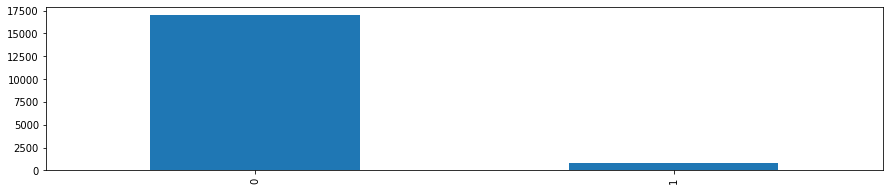

In [8]:
# Calculating the total number of classes
category_wise_df = collated_df.groupby('fraudulent')
print(f"Number of total categories is: ", category_wise_df.ngroups)

# Plotting the total number of news by category for better visualization
plt.figure(figsize=(15, 3))
collated_df['fraudulent'].value_counts().plot(kind='bar')

In [9]:
# Divide the dataset into train, validate/develop and test 
train, validate, test = \
            np.split(collated_df.sample(frac=1, random_state=42), 
                    [int(.6*len(collated_df)), int(.8*len(collated_df))])

print(f"The total number of sentences in train is {len(train)}")
print(f"The total number of sentences in validate is {len(validate)}")
print(f"The total number of sentences in test is {len(test)}")
print(f"The total number of sentence in the entire dataset is {len(base_df)}")

The total number of sentences in train is 10728
The total number of sentences in validate is 3576
The total number of sentences in test is 3576
The total number of sentence in the entire dataset is 2341


<AxesSubplot:>

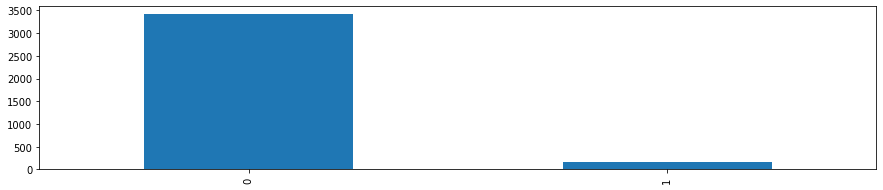

In [10]:
# Plotting the total number of news by category for better visualization
plt.figure(figsize=(15, 3))
validate['fraudulent'].value_counts().plot(kind='bar')

In [11]:
# Building the master dictionary that contains the word frequency
master_dict = {}
stop_words = set(stopwords.words('english'))
def to_dictionary(category):    
    vocab = []
    sentences = category
    for i in sentences:
        tokenized_sents= word_tokenize(i)
        for word in tokenized_sents:
            if(word not in stop_words and word.lower() and word.isalpha() and len(word) < 15):
                vocab.append(ps.stem(word))
    word_dic = Counter(vocab)
    return word_dic

for category in train['fraudulent'].unique():
    category_temp = train[train['fraudulent']== category]
    temp_dict = to_dictionary(category_temp['text'])
    master_dict[category]= temp_dict

In [12]:
# Converting the dictionary to data frame for ease of use
word_frequency_df = pd.DataFrame(master_dict).fillna(0)
word_frequency_df 

,0,1
hardwar,196.0,9.0
system,892.0,76.0
design,1991.0,41.0
engin,1539.0,218.0
US,739.0,68.0
...,...,...
lobbi,0.0,1.0
signagemeet,0.0,1.0
neededperform,0.0,1.0
currenc,0.0,1.0


In [13]:
# Building the dictionary that holds category wise sums and word wise probabilities
categories_to_iterate = list(word_frequency_df) #Prepared category for zip
category_sum = []
for category in categories_to_iterate:
    category_sum.append(word_frequency_df[category].sum()) # Prepared category sum for zip
dict_category_sum = dict(zip(categories_to_iterate,category_sum)) # Dictionary with category based sums
print(f"The dictionary that holds the cateogry wise sum is {dict_category_sum}")

dict_category_wise_probability = dict_category_sum.copy()

total_sentences_values = dict_category_wise_probability.values()
total = sum(total_sentences_values)

for key,value in dict_category_wise_probability.items():
    dict_category_wise_probability[key] = value / total
print(f"The dictionay that holds the category wise probabilities is {dict_category_wise_probability}")
    

The dictionary that holds the cateogry wise sum is {0: 394982.0, 1: 21158.0}
The dictionay that holds the category wise probabilities is {0: 0.9491565338587975, 1: 0.05084346614120248}


In [14]:
# Building word probability with the application of smoothing
prob_df = word_frequency_df
for category in categories_to_iterate:
    for index,row in prob_df.iterrows():
        row[category] = ((row[category]+1) / (dict_category_sum[category]+len(prob_df[category]))) # Smoothing
        prob_df.at[index,category] = row[category]
prob_df

,0,1
hardwar,0.000482,0.000289
system,0.002187,0.002227
design,0.004878,0.001215
engin,0.003771,0.006335
US,0.001812,0.001996
...,...,...
lobbi,0.000002,0.000058
signagemeet,0.000002,0.000058
neededperform,0.000002,0.000058
currenc,0.000002,0.000058


In [15]:
# For tokenizing the words and putting it into the word list
def return_word_list(sentence):
    tokenized_sentence = word_tokenize(sentence)
    for word in tokenized_sentence:
        if(word.lower() not in stop_words and word.isalpha()):
            word_list.append(ps.stem(word.lower()))
    return word_list

# For finding the conditional probability
def return_category_probability_dictionary(word_list,probab,prob_df,pro):
    help_dict = {}
    for i, row in probab.iterrows():
        for word in word_list:
            if(word in prob_df.index.tolist()):
                pro = pro * probab.loc[i,word] 
        help_dict[i] =  pro*dict_category_wise_probability[i]
        pro = 1
    return help_dict

In [16]:
Counter_total = 0
match = 0

probab = prob_df.transpose()
indexes = []
for ind in prob_df.index.tolist():
    indexes.append(ind.lower())

pro = 1
help_dict = {}
word_list = [] 
sentences = pd.DataFrame()

match = 0
total = 0
validate_test = pd.DataFrame()
counter = 0
TP =0
TN=0
FN=0
FP=0

# Predicting the classes based on the conditional probabilities
for ind,main_row in test.sample(n=100).iterrows():
#for ind,main_row in validate[validate['fraudulent'] == 1][:10].iterrows():
    sentence = main_row['text']
    word_list = return_word_list(sentence)
    
    # Get the dictionary that contains the final probability P(word|category)
    help_dict = return_category_probability_dictionary(word_list,probab,prob_df,pro)
    # Code to check if predicted is 0 and actually its 0 - True Negative
    # Code to check if predicted is 1 and actually its 1 - True Positive
    # Code to check if predicted is 0 and actually it is 1 - False negative
    # Code to check if predicted is 1 and actually it is 0 - False positive
    if(main_row['fraudulent'] == 0 and max(help_dict, key=help_dict.get) == 0):
        TN = TN + 1 
    if(main_row['fraudulent'] == 1 and max(help_dict, key=help_dict.get) == 1):
        TP = TP + 1 
    if(main_row['fraudulent'] == 1 and max(help_dict, key=help_dict.get) == 0):
        FN = FN + 1 
    if(main_row['fraudulent'] == 0 and max(help_dict, key=help_dict.get) == 1):
        FP = FP + 1 
    if(main_row['fraudulent'] == max(help_dict, key=help_dict.get)):
        match = match + 1 
    total = total + 1
    
print(f"The model predicted {match} correctly of {total}")
print(f"The model accuracy then is {int((match/total)*100)}%")
print(f"The True Negative count {TN}")
print(f"The True Positive count {TP}")
print(f"The False Negative count {FN}")
print(f"The False positive count {FP}")

The model predicted 99 correctly of 100
The model accuracy then is 99%
The True Negative count 99
The True Positive count 0
The False Negative count 1
The False positive count 0


**THE STOCHASTIC GRADIENT DESCENT APPROACH**

In [17]:
copy_df = df.copy()
copy_df.head(3)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0


<AxesSubplot:>

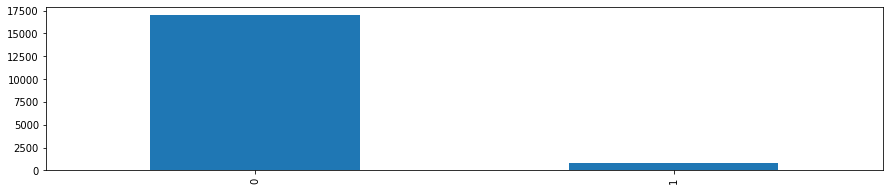

In [18]:
from matplotlib import pyplot as plt
# Plotting the total number of news by category for better visualization
plt.figure(figsize=(15, 3))
copy_df['fraudulent'].value_counts().plot(kind='bar')

In [19]:
copy_df = copy_df.replace(np.nan,'',regex=True)

In [20]:

# Cleaning the document
def standardize_text(copy_df, text_field):
    df2 = copy_df.copy(deep=True)
    
    df2[text_field] = copy_df[text_field].str.replace(r"http\S+", "", regex=True)
    df2[text_field] = copy_df[text_field].str.replace(r"http", "", regex=True)
    df2[text_field] = copy_df[text_field].str.replace(r"@\S+", "", regex=True)
    df2[text_field] = copy_df[text_field].str.replace(r"[^A-Za-z0-9(),!?@\'\`\"\_\n]", " ", regex=True)
    df2[text_field] = copy_df[text_field].str.replace(r"@", "at", regex=True)
    df2[text_field] = copy_df[text_field].str.lower()
    return df2
df_clean = standardize_text(copy_df, "description")
df_clean =  standardize_text(copy_df,"requirements")
df_clean =  standardize_text(copy_df,"company_profile")
df_clean.head(3)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,,"we're food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,,0,1,0,Other,Internship,,,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,,"90 seconds, the worlds cloud video production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",,,valor services provides workforce solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,,0,1,0,,,,,,0


In [21]:
df_clean['text'] = df_clean[['title', 'department','company_profile','description','requirements',
                     'benefits']].apply(lambda x: ' '.join(x), axis = 1)

In [22]:
# Efficient tokenization of the collated text
tokenizer = RegexpTokenizer(r'\w+')
df_clean["tokens"] = df_clean["text"].apply(tokenizer.tokenize)
df_clean['tokens']

0        [Marketing, Intern, Marketing, we, re, food52,...
1        [Customer, Service, Cloud, Video, Production, ...
2        [Commissioning, Machinery, Assistant, CMA, val...
3        [Account, Executive, Washington, DC, Sales, ou...
4        [Bill, Review, Manager, spotsource, solutions,...
                               ...                        
17875    [Account, Director, Distribution, Sales, vend,...
17876    [Payroll, Accountant, Accounting, weblinc, is,...
17877    [Project, Cost, Control, Staff, Engineer, Cost...
17878    [Graphic, Designer, Nemsia, Studios, is, looki...
17879    [Web, Application, Developers, Engineering, ve...
Name: tokens, Length: 17880, dtype: object

In [23]:
y = df_clean['fraudulent']
X = df_clean['text']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)


In [24]:
def dummy_fun(doc):
    return doc
tfidf = TfidfVectorizer(
    analyzer='word',
    tokenizer=dummy_fun,
    preprocessor=dummy_fun,
    token_pattern=None)  
tfidf.fit(X_train)
X_train_tfidf = tfidf.transform(X_train)
X_test_tfidf = tfidf.transform(X_test)
print(X_train_tfidf.shape)
print(X_test_tfidf.shape)

(14304, 1106)
(3576, 1106)


In [25]:
print("Before Undersampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before Undersampling, counts of label '0': {} \n".format(sum(y_train == 0)))
from imblearn.under_sampling import NearMiss
nr = NearMiss()

X_train_miss, y_train_miss = nr.fit_resample(X_train_tfidf, y_train.ravel())
X_test_miss, y_test_miss = nr.fit_resample(X_test_tfidf, y_test.ravel())

print('After Undersampling, the shape of train_X: {}'.format(X_train_miss.shape))
print('After Undersampling, the shape of train_y: {} \n'.format(y_train_miss.shape))
print("After Undersampling, counts of label '1': {}".format(sum(y_train_miss == 1)))
print("After Undersampling, counts of label '0': {}".format(sum(y_train_miss == 0)))

Before Undersampling, counts of label '1': 678
Before Undersampling, counts of label '0': 13626 

After Undersampling, the shape of train_X: (1356, 1106)
After Undersampling, the shape of train_y: (1356,) 

After Undersampling, counts of label '1': 678
After Undersampling, counts of label '0': 678


In [26]:
sgd_clf = SGDClassifier(loss="hinge", penalty="l2", random_state=100, max_iter=1000)
sgd_clf.fit(X_train_miss, y_train_miss)
y_predicted_sgd_clf = sgd_clf.predict(X_test_miss)
print(classification_report(y_test_miss, y_predicted_sgd_clf))

              precision    recall  f1-score   support

           0       0.78      0.95      0.85       188
           1       0.93      0.73      0.82       188

    accuracy                           0.84       376
   macro avg       0.85      0.84      0.84       376
weighted avg       0.85      0.84      0.84       376



In [27]:
sgd_clf.predict(tfidf.transform(['What is the meaning of life? for life is just a game of success']))

array([1])

In [28]:
sgd_clf.predict(tfidf.transform(['What we expect from you:Your key responsibility will be to communicate with the client, 90 Seconds team and freelance community throughout the video production process including, shoot planning, securing freelance talent, managing workflow and the online production management system. \xa0The aim is to manage each video project effectively so that we produce great videos that our clients love.Key\xa0attributesClient focused\xa0- excellent customer service and communication skillsOnline -\xa0oustanding computer knowledge and experience using online software and project management toolsOrganised\xa0- manage workload and able to multi-task100% attention to detailMotivated -\xa0self-starter with a passion for doing excellent work and achieving great resultsAdaptable\xa0- show initiative and think on your feet as this is a constantly evolving atmosphereFlexible\xa0- fast turnaround work and after hours availabilityEasy going\xa0&amp; upbeat\xa0- dosent get bogged down and loves the challengeSense of Humour\xa0- have a laugh and know that working in a startup takes guts!Ability to deliver\xa0- including meeting project deadlines and budgetAttitude is more important than experience at 90 Seconds, however previous experience in customer service and/or project management is beneficialPlease view our platform / website at\xa0#URL_395a8683a907ce95f49a12fb240e6e47ad8d5a4f96d07ebbd869c4dd4dea1826#\xa0and get a clear understand about what we do before reaching out']))

array([0])

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = df_clean['text']
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
vectorizer.get_feature_names_out()
print(X.shape)


(17880, 104268)


In [30]:
z = df_clean[df_clean['fraudulent'] == 1]
z_p = z['tokens']
q = df_clean[df_clean['fraudulent'] == 0]
q_p = q['tokens'].shape
z_p = z['tokens'].shape
print(z_p)
print(q_p)

(866,)
(17014,)


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


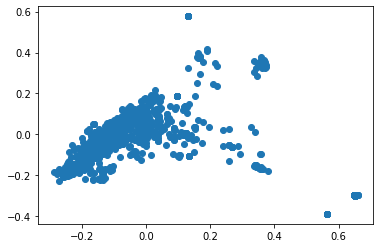

In [31]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
])        

fraud_job = df_clean[df_clean['fraudulent'] == 1]
fraud_job_text = fraud_job['text']

genuine_job = df_clean[df_clean['fraudulent'] == 0]
genuine_job_text = genuine_job['text'][:900]

X = pipeline.fit_transform(fraud_job_text).todense()

pca = PCA(n_components=2).fit(X)
data2D = pca.transform(X)

plt.scatter(data2D[:,0], data2D[:,1])
plt.show()


Undersampling implementaion Reference : https://www.kaggle.com/code/serikovasveta/fake-job-prediction-98-roc-auc-and-accuracy/notebook

In [32]:
columns = list(prob_df)
top_10 = {}
for category in columns:
    top_10[category] = prob_df[category].nlargest(n=10)
    
for key,value in top_10.items():
    print(f"For the category {key} the top 10 words are ->")
    print(f"{str(value)}")
    

For the category 0 the top 10 words are ->
work       0.012713
team       0.009062
We         0.008759
develop    0.008732
manag      0.007970
experi     0.007821
compani    0.006761
market     0.006511
servic     0.006496
product    0.006234
Name: 0, dtype: float64
For the category 1 the top 10 words are ->
product    0.008533
work       0.006942
manag      0.006566
engin      0.006335
experi     0.005467
develop    0.005265
servic     0.005178
custom     0.005033
team       0.005004
test       0.004542
Name: 1, dtype: float64


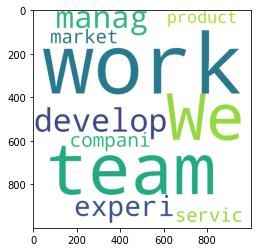

In [33]:
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud
wc = WordCloud(background_color="white",width=1000,height=1000, max_words=10,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(top_10[0])
plt.imshow(wc)

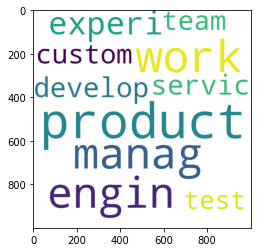

In [34]:
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud
wc = WordCloud(background_color="white",width=1000,height=1000, max_words=10,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(top_10[1])
plt.imshow(wc)